## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results

# Display study_results table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Display mouse_metadata table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# Merge data on Mouse ID
merged_data = mouse_metadata.merge(study_results.set_index('Mouse ID'), on='Mouse ID')
merged_data.to_csv("resources/merged_data.csv")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Drop mouse IDs with duplicate timepoint entries
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'last')
clean_data.to_csv("resources/clean_data.csv")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mouse_metadata
mice_count = merged_data['Mouse ID'].count()
print('Total Number of mice:',(mice_count))

Total Number of mice: 1893


In [112]:
# Optional: Get all the data for the duplicate mouse ID. 



## Summary Statistics

In [7]:
#Calcuate SEM of Tumor Volume #1
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#Calcuate Std of Tumor Volume #1
std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#Calcuate Variance of Tumor Volume
var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#Calcuate Median of Tumor Volume
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#Calcuate Mean of Tumor Volume #1
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#Combine summation into summary df
summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std": std, "SEM": sem})
summary

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:

pd_bar_df = clean_data.filter(['Drug Regimen','Mouse ID'], axis=1)
pd_bar_df
regimen_gp = pd_bar_df.groupby(['Drug Regimen']).count()
pd_bar_df


,Drug Regimen,Mouse ID
0,Ramicane,k403
1,Ramicane,k403
2,Ramicane,k403
3,Ramicane,k403
4,Ramicane,k403
...,...,...
1888,Naftisol,z969
1889,Naftisol,z969
1890,Naftisol,z969
1891,Naftisol,z969


Text(0, 0.5, 'Number of measurements taken')

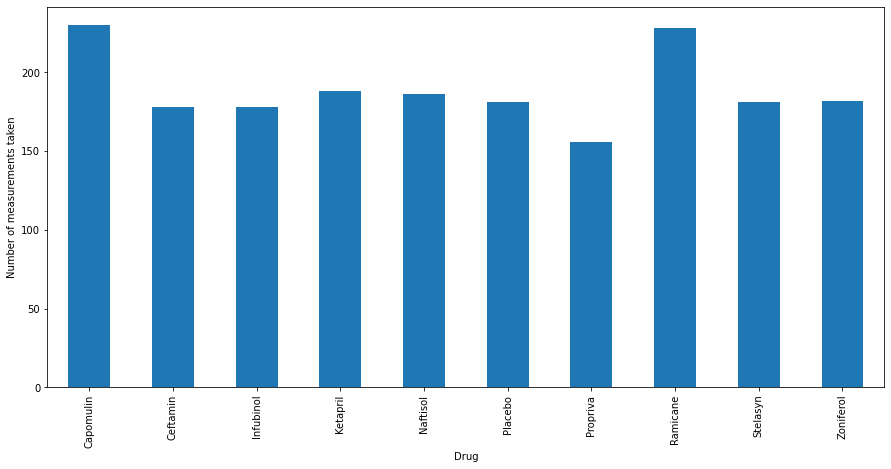

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
fig, ax = plt.subplots(figsize=(15,7))
pd_bar_df.groupby(['Drug Regimen']).count()['Mouse ID'].plot.bar(ax=ax)
ax.set_xlabel('Drug')
ax.set_ylabel('Number of measurements taken')

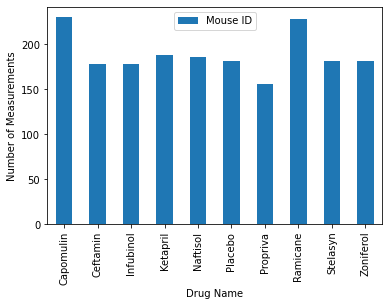

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_measurments = regimen_gp.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_measurments.set_xlabel("Drug Name")
count_measurments.set_ylabel("Number of Measurements")


plt.show()
plt.tight_layout()

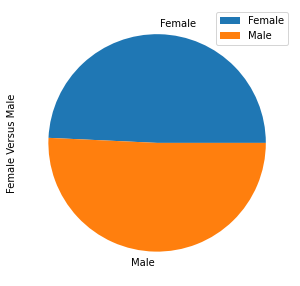

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pd_pie_df = clean_data.filter(['Drug Regimen','Sex'], axis=1)
sex_gp = pd_pie_df.groupby( ["Sex"] ).size().to_frame(name = 'Female Versus Male')
sex_gp

plot = sex_gp.plot.pie(y='Female Versus Male', figsize=(5, 5))


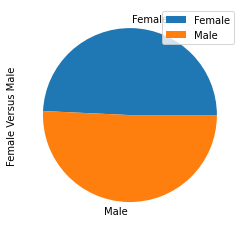

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_measurments = sex_gp.plot(kind='pie', subplots=True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [12]:
# Start by getting the last (greatest) timepoint for each mouse
latest_time = clean_data.groupby('Mouse ID')['Timepoint','Tumor Volume (mm3)'].max()
# tumor_vol = clean_data.groupby('Mouse ID','Tumor Volume (mm3)')['Timepoint'].max().to_frame()
latest_time

<ipython-input-12-a56aae31acb2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latest_time = clean_data.groupby('Mouse ID')['Timepoint','Tumor Volume (mm3)'].max()


,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,45.000000
z581,45,62.754451


In [13]:
sample = clean_data.copy()
sample.to_csv("resources/sample_data.csv")
sample

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
merged_df = latest_time.merge(sample, right_on='Mouse ID', left_on='Mouse ID')
merged_df
gr_merged_df = merged_df.groupby('Mouse ID')['Timepoint_y','Drug Regimen','Sex','Tumor Volume (mm3)_y','Age_months', 'Metastatic Sites','Weight (g)'].max()
gr_merged_df

<ipython-input-14-f5c7eb3e2bcc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr_merged_df = merged_df.groupby('Mouse ID')['Timepoint_y','Drug Regimen','Sex','Tumor Volume (mm3)_y','Age_months', 'Metastatic Sites','Weight (g)'].max()


,Timepoint_y,Drug Regimen,Sex,Tumor Volume (mm3)_y,Age_months,Metastatic Sites,Weight (g)
Mouse ID,,,,,,,
a203,45,Infubinol,Female,67.973419,20,2,23
a251,45,Infubinol,Female,65.525743,21,1,25
a262,45,Placebo,Female,70.717621,17,4,29
a275,45,Ceftamin,Female,62.999356,20,3,28
a366,30,Stelasyn,Female,63.440686,16,1,29
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,48.710661,12,0,26
z578,45,Ramicane,Male,45.000000,11,0,16
z581,45,Infubinol,Female,62.754451,24,3,25


In [15]:
cov_column = gr_merged_df.iloc[:, 1]
cov_column



Mouse ID
a203    Infubinol
a251    Infubinol
a262      Placebo
a275     Ceftamin
a366     Stelasyn
          ...    
z435     Propriva
z578     Ramicane
z581    Infubinol
z795     Naftisol
z969     Naftisol
Name: Drug Regimen, Length: 249, dtype: object

In [35]:
#1 Create empty list to fill with tumor vol data (for plotting)
treatment1 = ['Infubinol']
treatment2 = ['Ceftamin']
treatment3 = ['Ramicane']
# Ceftamin = ['Infubinol', 'Ceftamin', 'Ramicane','Capomulin']
t_vol = gr_merged_df.iloc[:, 1]
# tumor_treat1 = []
# for t in t_vol:
#     if t == 'Infubinol':
#         tumor_treat1.append(t)

tumor_treat1 = []
for t in gr_merged_df:
    if t == 'Infubinol':
        tumor_treat1.append(t)


# tumor_treat2 = []
# for tt in t_vol:
#     for t2 in tt:
#         tumor_treat2.append(tt)

# tumor_treat3 = []
# for ttt in t_vol:
#     for t3 in treatment3:

#         tumor_treat3.append(ttt)

# tumor_treat1
tumor_treat1
# tumor_treat3


[]

In [ ]:

#2 Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    #2.a Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    #2.b add subset 
    
    
    #2.c Determine outliers using upper and lower bounds

In [17]:
tumor_vol_df = pd.DataFrame(tumor_vol,columns=['Tumer_volume'])
quartiles = tumor_vol_df.quantile([.25,.5,.75])
lowerq = quartiles(0.25)
upperq = quartiles(0.75)
iqr = upperq-lowerq
quartiles

NameError: name 'tumor_vol' is not defined

In [18]:
#finding the quartile
x = pd.Series(tumor_treat1)
q1 = x.quantile(0.25)
q2 = x.quantile(0.50)
q3 = x.quantile(0.75)
iqr = q3-q1
print("Q1 Quantle is", q1)
print("Q2 Quantle is", q2)
print("Q3 Quantle is", q3)
print("IQR is", iqr)



Q1 Quantle is nan
Q2 Quantle is nan
Q3 Quantle is nan
IQR is nan
<ipython-input-18-ddd66dde4882>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series(tumor_treat1)


In [350]:
#finding the quartile
x2 = pd.Series(tumor_treat2)
q1_2 = x.quantile(0.25)
q2_2 = x.quantile(0.50)
q3_2 = x.quantile(0.75)
iqr_2 = q3_2-q1_2
print("Q1 Quantle is", q1_2)
print("Q2 Quantle is", q2_2)
print("Q3 Quantle is", q3_2)
print("IQR is", iqr_2)

Q1 Quantle is 46.91089166
Q2 Quantle is 55.84141007
Q3 Quantle is 64.95756185
IQR is 18.046670190000007


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin, Ramicane, Infubinol, and Ceftamin


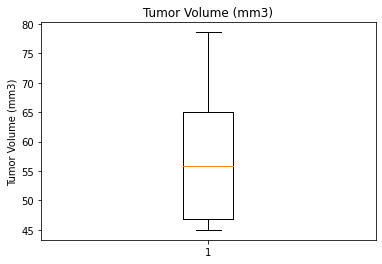

In [297]:
volume = gr_merged_df['Tumor Volume (mm3)_y']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(x)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


## Scratch Code

In [218]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = gr_merged_df['Drug Regimen'].unique()
treatments

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [281]:

l = []
for i in cov_column:
    l.append(i)
    # print(gr_merged_df.loc[i, 1])
   
    
# l

# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volume (mm3)')
# ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.boxplot(l)
# plt.show()